[(<matplotlib.lines.Line2D at 0x7f61456cd580>, 'False'),
 (<matplotlib.lines.Line2D at 0x7f61456cdc40>, 'True')]

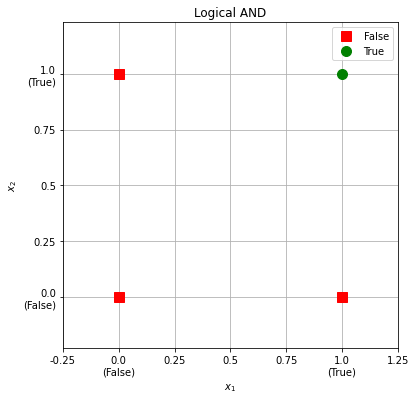

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from IPython.display import Latex
%matplotlib inline

data = [(np.array([0, 0]), False),
        (np.array([1, 0]), False),
        (np.array([0, 1]), False),
        (np.array([1, 1]), True)]


fig = plt.figure(figsize=(6, 6))
ax = fig.gca()

def plot_problem():
    for sample in data:
        sample_input = sample[0]
        ground_truth = sample[1]

        if ground_truth: # If output is True
            sample_marker = 'o'
            sample_color = 'green'
        else:
            sample_marker = 's'
            sample_color = 'red'

        plt.plot(sample_input[0],
                sample_input[1],
                sample_marker,
                color=sample_color,
                markersize=10,
                label=ground_truth)
    plt.axis('equal')
    limits = [-.25, 1.25, -.25, 1.25]
   
    plt.grid()
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    handles, labels = ax.get_legend_handles_labels()
    legends = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*legends))
    plt.title('Logical AND')

    ticks = np.arange(limits[0], 2*limits[1], .25)
    tick_labels = [str(tick) for tick in ticks]
    tick_labels[np.where(ticks == 0)[0][0]] += '\n(False)'
    tick_labels[np.where(ticks == 1)[0][0]] += '\n(True)'
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)
    plt.axis(limits)

    return legends

plot_problem()

<IPython.core.display.Latex object>

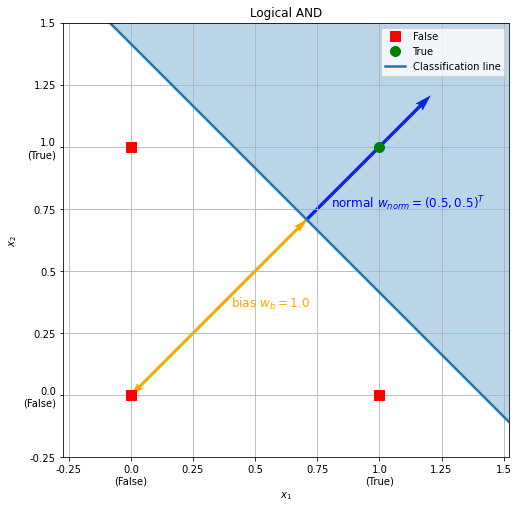

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

def plot_classification():    

    legends = plot_problem()

    weights = np.atleast_2d([.5, .5, 1.]).T

    direction = weights[:2]
    bias = weights[2, 0]
    bias_vec = bias * direction / np.linalg.norm(direction)
    plt.quiver(bias_vec[0], bias_vec[1], weights[0], weights[1], color='b', angles='xy', scale_units='xy', scale=1)
    plt.text(bias_vec[0]+.1, bias_vec[1]+.05, r"normal $w_{norm} = (%s, %s)^T$"%(direction[0][0], direction[1][0]), color='blue', fontsize=12)

    plt.quiver(0, 0, bias_vec[0], bias_vec[1], color='orange', angles='xy', scale_units='xy', scale=1, width=.006)
    plt.quiver(bias_vec[0], bias_vec[1], -bias_vec[0], -bias_vec[1], angles='xy', scale_units='xy', scale=1, color='orange', width=.006)
    plt.text(bias_vec[0]/2+.05, bias_vec[1]/2, r"bias $w_b = %s$"%(bias), color='orange', fontsize=12)

    # Parameterization
    t = np.arange(-2, 2, .1)
    line_direction = np.array([direction[1], - direction[0]])
    classification_line = line_direction * t + bias_vec 
    classification_plot = plt.plot(classification_line[0], classification_line[1], linewidth=2.5)
    plt.fill_between(classification_line[0], classification_line[1], np.max(classification_line[1]), alpha=.3)

    legends.append((classification_plot[0], 'Classification line'))
    plt.legend(*zip(*legends))
    plt.axis([-.25, 1.5, -.25, 1.5])

plot_classification()
Latex('''
Lets define a classification line with normal respectively bias
$$\\mathbf{w_{norm}} = \\begin{pmatrix} 0.5 \\\ 0.5\\end{pmatrix}, w_b = 1$$
''')

In [24]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
    ["resetEquationNumbers", MathJax.InputJax.TeX],
    ["PreProcess", MathJax.Hub],
    ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

<IPython.core.display.Latex object>

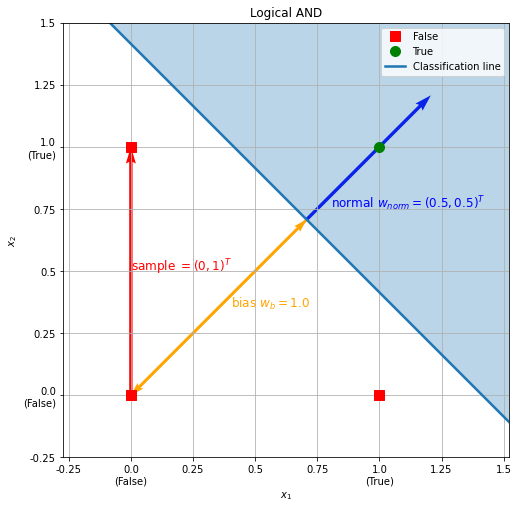

In [25]:


fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

plot_classification()
sample = data[2][0]
plt.quiver(0, 0, sample[0], sample[1], color='r', angles='xy', scale_units='xy', scale=1)
plt.text(sample[0]/2, sample[1]/2, r"sample $ = (%s, %s)^T$"%(sample[0], sample[1]), color='red', fontsize=12)
Latex('''
Let prediction

\\begin{equation}
y = a(s) = \\begin{cases} 1, \\text{ if } s \\geq 0,\\\ 0 \\text{ otherwise}
\\end{cases}
\\end{equation}
where a is some activation function and
\\begin{align}
s &= w_1 x_1 + w_2 x_2 - w_b \\\ 
&= \\begin{pmatrix} w_1 & w_2\\end{pmatrix} \\begin{pmatrix} x_1 \\\ x_2\\end{pmatrix} - w_b \\\ 
&= \\begin{pmatrix} w_1 & w_2 & -w_b\\end{pmatrix} \\begin{pmatrix} x_1 \\\ x_2 \\\ 1\\end{pmatrix} \\\ 
&= \\textbf{w}^T \\textbf{x} 
\\end{align}
is a weighted sum of the input.
We have let the weights
$\\textbf{w} = \\begin{pmatrix} 0.5 \\\ 0.5 \\\ -1 \\end{pmatrix}.$
\\begin{equation}
\\mathbf{x_i} = \\left\\{
\\begin{pmatrix} 0\\\ 0\\end{pmatrix},
\\begin{pmatrix} 0\\\ 1\\end{pmatrix},
\\begin{pmatrix} 1\\\ 0\\end{pmatrix},
\\begin{pmatrix} 1\\\ 1\\end{pmatrix}
\\right\\}
\\end{equation}
''')